In [25]:
# Making SST anomaly plots and read a text file.

In [26]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

In [27]:
# Let's first download the data from Canvas
filename='sst2_1979_2012.nc'

# Full SST data can be downloaded from 
# https://www.metoffice.gov.uk/hadobs/hadisst/data/download.html

In [29]:
# Next, let's open the data using xarray
#filename='/Users/jungeunl/Cycad/class/data/sst2_1979_2012.nc' # using Python on my laptop

with xr.open_dataset(filename) as ds: 
    sst = ds.sst
    print(ds)  

<xarray.Dataset>
Dimensions:    (latitude: 180, longitude: 360, nv: 2, time: 408)
Coordinates:
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude  (longitude) float32 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * time       (time) datetime64[ns] 1979-01-16T12:00:00 ... 2012-12-16T12:00:00
Dimensions without coordinates: nv
Data variables:
    sst        (time, latitude, longitude) float32 ...
    time_bnds  (time, nv) float32 ...
Attributes:
    Title:                      Monthly version of HadISST sea surface temper...
    description:                HadISST 1.1 monthly average sea surface tempe...
    institution:                Met Office Hadley Centre
    source:                     HadISST
    reference:                  Rayner, N. A., Parker, D. E., Horton, E. B., ...
    Conventions:                CF-1.0
    history:                    Tue Feb  4 14:20:22 2014: ncks -d time,1308,1...
    supplementary_information:  Updates and supplemen

## GroupBy: split-apply-combine

Split your data into multiple independent groups.   
Apply some function to each group.   
Combine your groups back into a single data object.   
http://xarray.pydata.org/en/stable/groupby.html

In [19]:
# Let's calculate climatology for each month
sst_clim = sst.groupby('time.month').mean(dim='time')

# Calculate anomaly
sst_anom = sst.groupby('time.month') - sst_clim

In [24]:
# Check time
print(ds.time)

<xarray.DataArray 'time' (time: 408)>
array(['1979-01-16T12:00:00.000000000', '1979-02-15T00:00:00.000000000',
       '1979-03-16T12:00:00.000000000', ..., '2012-10-16T12:00:00.000000000',
       '2012-11-16T12:00:00.000000000', '2012-12-16T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1979-01-16T12:00:00 ... 2012-12-16T12:00:00
Attributes:
    long_name:      Time
    standard_name:  time


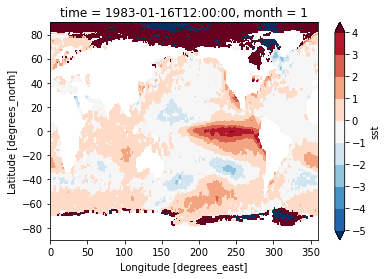

In [20]:
# Make an anomaly plot for January 1983
sst_anom.sel(time='1983-01-16',method='closest').plot(levels=np.arange(-5,5,1))

### Exercise
Make an anomaly plot for January 1984

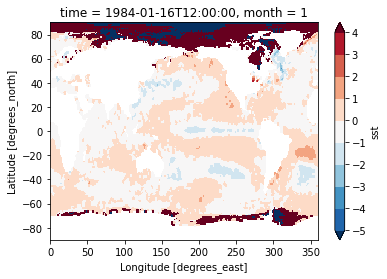

In [23]:
sst_anom.sel(time='1984-01-16',method='closest').plot(levels=np.arange(-5,5,1))

### Exercise
Make an anomaly plot for January 1998

## Reading a text file

In [144]:
# Read SST data (for homework) using numpy loadtxt
#f2=np.loadtxt(path+'sst_nino3.txt',delimiter=',',skiprows=1)  # my computer
f2=np.loadtxt('sst_nino3.txt',delimiter=',',skiprows=1)  # my computer

In [146]:
# Save column 1 as time and column 2 as sst, and check the size
time=f2[:,0]
sst=f2[:,1]
print(sst.shape)

(408,)


In [159]:
# Calculate monthly average
nt=len(time)  # length of time
nm=12         # number of month
nyr=np.int(nt/12)    # converting float to integer
print(nyr)

sst2=sst.reshape(nyr,nm)  # reshape an array
print(sst2.shape)
sst_clim=np.mean(sst2,axis=0)
print(sst_clim.shape)

34
(34, 12)
(12,)


In [160]:
# Now let's calculate anomaly
sst_an=np.zeros((nt))   # create an array

# Check sst_an
print(sst_an)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

### For loops
- Many programming tasks require repeating similar operations several times.  
- Example: perform some computation for each data point in some data set
- This can be accomplished using a for loop
- In python, for loops allow repeating operations for each item in a list
> for x in list1:   
...    print(x)
- A very common construct is to loop over a list created by range
> for x in range(5):
...    print(x)

In [154]:
for i in range(nt):
    m=i%12              # returns a remainder
    sst_an[i]=sst[i]-sst_clim[m]

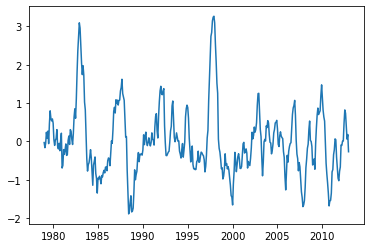

In [155]:
plt.plot(time,sstan)